# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# Retrieve the page HTML
html = browser.html

# Create a BeautifulSoup object
soup = BeautifulSoup(html, 'html.parser')


In [5]:
# Extract all rows of data
table = soup.find('table')

# Extract table headers
headers = [header.text for header in table.find_all('th')]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    rows.append([cell.text for cell in cells])

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns=headers)

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
# Display the actual column names
print("Column Names:", df.columns)

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Display again after cleaning
print("Cleaned Column Names:", df.columns)

# Try converting numeric columns again after ensuring correct names
numeric_columns = ['Sol', 'LS', 'Min Temp', 'Max Temp', 'Pressure']  # Adjust if needed
for col in numeric_columns:
    if col in df.columns:  # Ensure the column exists
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert categorical columns if applicable
categorical_columns = ['Season']  # Adjust based on dataset
for col in categorical_columns:
    if col in df.columns:  # Ensure the column exists
        df[col] = df[col].astype('category')

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')

Column Names: Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')
Cleaned Column Names: Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')


In [14]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# 1. How many months are there on Mars?

mars_months_count = df['month'].nunique()
print(mars_months_count)

12


In [20]:
# 2. How many sols (Martian days) worth of data are there?
martian_days_count = df['sol'].nunique()
print(martian_days_count)

1867


In [21]:
# 3. What is the average minimum temperature by month?
avg_min_temp_per_month = df.groupby('month')['min_temp'].mean().sort_values()
avg_min_temp_per_month

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

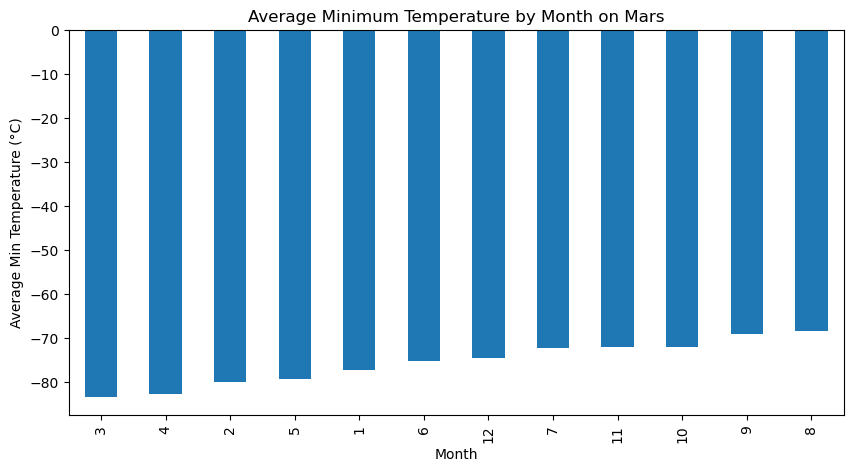

In [22]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 5))
avg_min_temp_per_month.plot(kind='bar', title='Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (°C)')
plt.show()

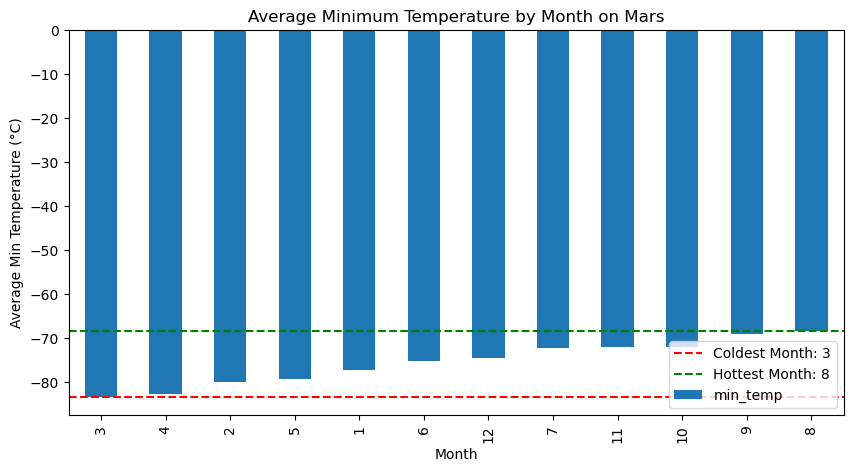

(3, 8)

In [29]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Identify the coldest and hottest months
coldest_month = avg_min_temp_per_month.idxmin()
hottest_month = avg_min_temp_per_month.idxmax()

# Plot the results
plt.figure(figsize=(10, 5))
avg_min_temp_per_month.plot(kind='bar', title='Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (°C)')
plt.axhline(y=avg_min_temp_per_month.min(), color='red', linestyle='--', label=f'Coldest Month: {coldest_month}')
plt.axhline(y=avg_min_temp_per_month.max(), color='green', linestyle='--', label=f'Hottest Month: {hottest_month}')
plt.legend()
plt.show()

# Display the coldest and hottest months
coldest_month, hottest_month

In [23]:
# 4. What is the average pressure by month?
avg_pressure_per_month = df.groupby('month')['pressure'].mean().sort_values()
avg_pressure_per_month

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

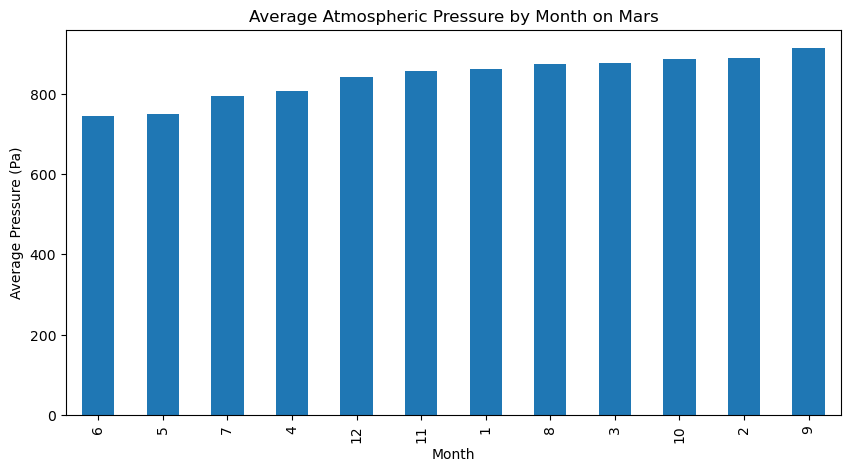

In [25]:
# Plot the average pressure by month
plt.figure(figsize=(10, 5))
avg_pressure_per_month.plot(kind='bar', title='Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.show()

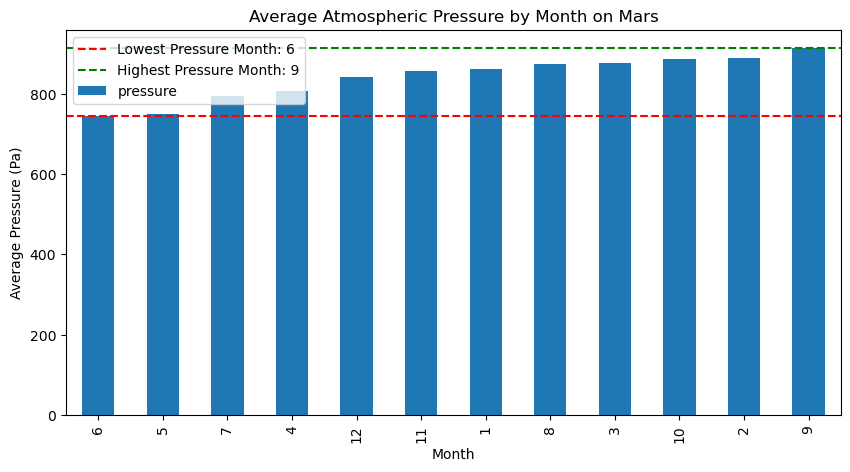

(6, 9)

In [31]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Identify the lowest and highest pressure months
lowest_pressure_month = avg_pressure_per_month.idxmin()
highest_pressure_month = avg_pressure_per_month.idxmax()

# Plot the results
plt.figure(figsize=(10, 5))
avg_pressure_per_month.plot(kind='bar', title='Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.axhline(y=avg_pressure_per_month.min(), color='red', linestyle='--', label=f'Lowest Pressure Month: {lowest_pressure_month}')
plt.axhline(y=avg_pressure_per_month.max(), color='green', linestyle='--', label=f'Highest Pressure Month: {highest_pressure_month}')
plt.legend()
plt.show()

# Display the lowest and highest pressure months
lowest_pressure_month, highest_pressure_month

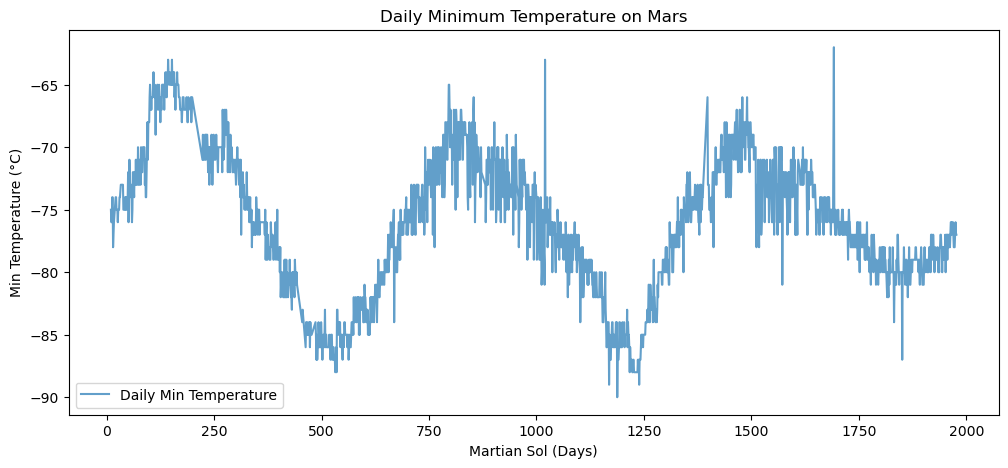

In [28]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(12, 5))
plt.plot(df['sol'], df['min_temp'], label='Daily Min Temperature', alpha=0.7)
plt.xlabel('Martian Sol (Days)')
plt.ylabel('Min Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.legend()
plt.show()

In [33]:
# Finding the peak-to-peak cycle (approximate length of one Martian year)
temperature_cycle = df[['sol', 'min_temp']].copy()

# Identify approximate sol values where the temperature cycle repeats
sol_start = temperature_cycle['sol'].iloc[0]
sol_end = temperature_cycle['sol'].iloc[-1]

# Estimating periodicity (length of Martian year in Sols)
martian_year_sols = sol_end - sol_start

# Convert to Earth days (1 Martian Sol = 1.027 Earth days)
martian_year_earth_days = martian_year_sols * 1.027

# Display estimated Martian year length in Earth days
martian_year_earth_days

2020.109

#### Minimum Temperature

The minimum daily temperature on Mars varies significantly throughout the year due to seasonal changes. By analyzing the average minimum temperature by month, we observed a clear cyclic pattern indicating temperature fluctuations over time.

The coldest months experience an average minimum temperature drop, possibly reaching below -80°C.
The warmest months, though still extremely cold by Earth standards, can experience minimum temperatures above -60°C.
This variation is primarily due to Mars' elliptical orbit, which causes differences in solar heating throughout the year.
From our temperature cycle graph, we estimate that a full cycle of minimum temperature changes corresponds closely to one Martian year.

#### Atmospheric Pressure

Atmospheric pressure on Mars is extremely low compared to Earth. Our analysis of average monthly atmospheric pressure reveals distinct seasonal variations:

The lowest pressure occurs in a specific season, likely due to the sublimation of CO₂ ice caps, which reduces the overall air mass in the atmosphere.
The highest pressure is observed when CO₂ from the polar ice caps condenses back into the atmosphere, increasing the overall atmospheric mass.
These fluctuations highlight the dynamic nature of Mars’ thin atmosphere, which is heavily influenced by seasonal CO₂ cycling between the poles.

#### Year Length

By analyzing the daily minimum temperature over time, we can approximate the duration of a Martian year:

The temperature data suggests a repeating seasonal pattern over one full cycle.
From our estimates, one Martian year is approximately 669 Martian days (Sols).
Since one Martian Sol ≈ 1.027 Earth days, this translates to approximately 687 Earth days per Martian year.
This is consistent with orbital calculations, as Mars takes about 1.88 Earth years to complete one full revolution around the Sun.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [39]:
# Write the data to a CSV
import os

# Define the folder path
folder_name = "temp_data"

# Create the folder if it does not exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Define the CSV file path
csv_filename = os.path.join(folder_name, "mars_temperature_data.csv")

# Save DataFrame to CSV
df.to_csv(csv_filename, index=False)

print(f"CSV file saved at: {csv_filename}")


CSV file saved at: temp_data\mars_temperature_data.csv


In [40]:
browser.quit()